**importing libraries**

In [1]:
import  warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np  #linear algebra
import pandas as pd  # dataprocessing and ,csv file I/o

In [3]:
#mount G.drive to Google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np  #linear algebra
import pandas as pd  # dataprocessing and ,csv file I/o
import seaborn as sns #it is a python data visualisation library based on matplotlib
import matplotlib.pyplot as plt
import plotly.express as px # allows us to create interactive plots with vey little code
from xgboost import XGBRegressor
from sklearn.svm import SVR

**Data Analysis**

**Load and prepare data**

In [5]:
#mental-and-substance-use-as-share-of-disease
df1=pd.read_csv("/content/drive/MyDrive/Mental_health_fitness_tracker/mental-and-substance-use-as-share-of-disease -AI.csv")

#prevalence-by-mental-and-substance-use-disorder
df2=pd.read_csv("/content/drive/MyDrive/Mental_health_fitness_tracker/prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [6]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [7]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [8]:
merged_df = pd.merge(df1, df2)
merged_df



,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.193166,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,2.279813,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,2.364265,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,2.472949,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711


In [9]:
merged_df = pd.merge(df2, df1)
merged_df.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422,1.738272
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837,1.778098
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938,1.781815
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665,1.729402
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428,1.850988


In [10]:
merged_df.isnull().sum()


Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [11]:
merged_df.drop('Code',axis=1,inplace=True)

In [12]:
merged_df.set_axis(['country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol','mental_fitness'], axis='columns', inplace=True)


In [13]:
merged_df.head()


,country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


**Data visualisation**

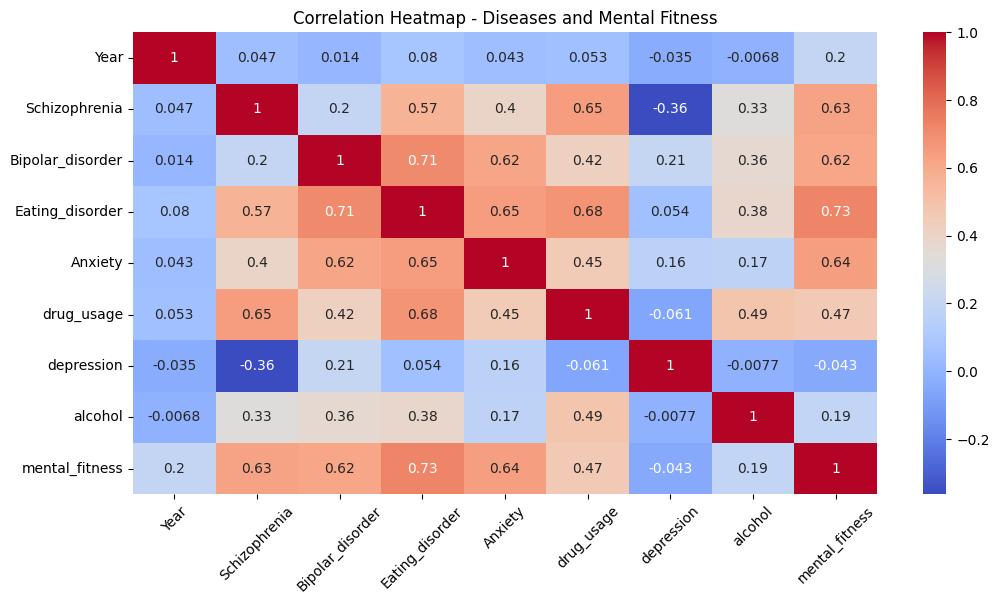

In [14]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.show()



In [15]:
#mean
mean = merged_df['mental_fitness'].mean()
mean

4.8180618117506135

In [16]:
fig=px.pie(merged_df,values='mental_fitness',names='Year')
fig.show()

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [18]:
#transform non-numeric labels to numeric labels
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()

# Iterate over the columns of the DataFrame
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        # Use the label encoder to transform the categorical data into numerical labels
        merged_df[column] = l.fit_transform(merged_df[column])

In [19]:
merged_df.shape

(6840, 10)

**Splitting data**

In [20]:
x=merged_df[['Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol']]
y=merged_df['mental_fitness']

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

print("xtrain:",x_train.shape)
print("xtest:",x_test.shape)
print("ytrain:",y_train.shape)
print("ytest:",y_test.shape)



xtrain: (5472, 7)
xtest: (1368, 7)
ytrain: (5472,)
ytest: (1368,)


**model selection**

In [21]:
from sklearn.linear_model import LinearRegression
#fit linear regression model
model=LinearRegression()
model.fit(x_train,y_train)
#making predicton
y_pred=model.predict(x_test)

MSE=mean_squared_error(y_test,y_pred)
print("MSE :",MSE)
r2score=r2_score(y_test,y_pred)
print("r2:",r2score)



MSE : 1.2679652160753536
r2: 0.7364132259471134


**RandomForest Regressor**

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print("MSE :",forest_mse)
print("r2 score :",forest_r2)

MSE : 0.03843478943166725
r2 score : 0.9920101103490421


**XGBoost Regressor**

In [23]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("MSE :",xgb_mse)
print("r2 score :",xgb_r2)

MSE : 0.06907663301236996
r2 score : 0.9856402315873279


**Support Vector Regressor**

In [24]:
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print("MSE :",svr_mse)
print("r2 score :",svr_r2)

MSE : 1.277481300829322
r2 score : 0.7344350060006103


**Evaluation**




In [25]:
# Calculate the scores of Random Forest Regressor model
rfscore = forest_model.score(x_test, y_test)

# Calculate the scores of XGBoost Regressor model
xgbscore = xgb_model.score(x_test,y_test)

# Calculate the scores of support vector Regressor model
svrscore = svr_model.score(x_test,y_test)

print("EVALUATION OF MODELS")
print("-"*40)
print("Random Forest Regressor Score:{:.2f}".format(rfscore))
print("XGBoost Regressor Score:{:.2f}".format(xgbscore))
print("Support Vector Regressor Score:{:.2f}".format(svrscore))

EVALUATION OF MODELS
----------------------------------------
Random Forest Regressor Score:0.99
XGBoost Regressor Score:0.99
Support Vector Regressor Score:0.73
